### **GitHub repo link:** https://github.com/dpc43/Data271Project

## **Introduction:**

California is well-known for its high cost of living. Over the last few decades, significant demographic and economic changes point to these costs becoming even higher than they were in the past, especially in relation to other states. For the first time in recent history, for instance, California had a declining population during the pandemic with many citing the increase in housing costs and the cost of living as their primary reasons for leaving (http://www.ppic.org). In addition to high cost of living, wage stagnation and income inequality are among other factors that may be exacerbating the higher costs of living (https://projects.calmatters.org/2018/digging-data-attainable-california-dream-today/).

To explore this issue in more detail, we will analyze U.S. Census data to see if there are any clear patterns, trends, or relationships between cost of living, income distribution, and demographics in California since the 1990's. We may also compare how the cost of living in California has changed compared to other states within the US. The methods we plan to use to analyze the data include descriptive statistics, data visualization, identification of relationships and patterns, and transforming or creating features for further analysis, as needed. 

The analysis will help address this issue by creating a clearer picture of the long-term economic and demographic trends that may be contributing to California becoming an increasingly harder place to live. It may also help point to whether not these trends are likely to continue in the future. Knowing this information could help consumers of our analysis by highlighting specific factors that could be addressed to help prevent this situation from getting worse and to help move towards improving the quality of life in California both now and in the future.

## **Modules:**

These are the modules that will be used for this analsis and the reasons they are necessary:

- **Numpy:** to manipulate data and make calculations efficiently using multi-dimensional arrays
- **Pandas:** to clean, transform, and analyze large datasets using the speed and flexibility of Series and DataFrames
- **Matplotlib:** to enhance control of plot elements when creating data visualizations
- **Seaborn:** to create aesthetically pleasing and informative data visualizations
- **re:** to easily get strings and clean the columns names
- **warnings:** to filter out warning messages and provide a cleaner layout to the notebook

In [2]:
# Import Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

C:\Users\hlc19\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## **Data Description**:

<u>**Source:**</u> 
All of the datasets are sourced from IPUMS (Integrated Public Use Microdata Series) USA, an organization that "collects, preserves and harmonizes U.S. census microdata and provides easy access to this data with enhanced documentation. Data includes decennial censuses from 1790 to 2010 and American Community Surveys (ACS) from 2000 to the present." 

Steven Ruggles, Sarah Flood, Matthew Sobek, Daniel Backman, Grace Cooper, Julia A. Rivera Drew, Stephanie Richards, Renae Rodgers, Jonathan Schroeder, and Kari C.W. Williams. IPUMS USA: Version 16.0 Minneapolis, MN: IPUMS, 2025. https://doi.org/10.18128/D010.V16.0

<u>**Original Purpose:**</u> For the purpose of this analysis, two types of surveys were chosen -- the American Community Survey (ACS) 1-year (for the years 2000, 2006, 2011, 2016, 2021, and 2023) and the 1% Metro Sample Survey (for the year 1990 only since there wasn't yet an ACS survey prior to 2000). The purpose of the ACS 1-year surveys are to provide "vital information on a yearly basis about our nation and its people. Information from the survey generates data that help inform how trillions of dollars in federal funds are distributed each year" (https://www.census.gov/programs-surveys/acs/about.html). For example, in addition to general demographic information like age, sex, and race traditionally gathered in the decennial (10-year) census, the ACS surveys sample the population to gather additional information about jobs and occupations, educational attainment, veterans, whether people own or rent their homes, and more. The 1% Metro Sample Survey was a precursor to the ACS surveys, but had a similar purpose and was chosen for this analysis to provide a broader range of data over a longer time span.

<u>**Sampling Methodology:**</u> Both the ACS 1-year surveys and 1% Metro Samply Survey were administered by US Census Bureau representatives, primarily through mail-in (and later internet) surveys, with telephone calls and/or in-person interviews used to follow-up with non-respondants. Even though the ACS 1-year surveys and 1% Metro Samply Survey are adiminstered similarly, there are some key differences in the sampling methodology. Specifically, the 1% Metro Survey is based on a 1-in-100 random sample of the US population selected from the decennial survey taken on a specific day (April 1st of that year). In contrast, the ACS 1-year survey is a random rolling sample of 1-in-100 US households taken throughout the year (beginning in 2005) and 1-in-750 US households (in 2000). For both survey types, the sample size is generally considered to be good for areas with populations of at least 65,000 or more (except for the ACS 1-year survey in 2000, in which no population smaller than the state level can be identified). More information on the survey samples can be found here: https://usa.ipums.org/usa/sampdesc.shtml.

<u>**Response Rate:**</u> While a response rate could not be found for the 1% Metro Survey in 1990, the overall response rate for the decennial survey in 1990 (from which data was gathered for the 1% Metro Survey) was around 67%. The response rate for the ACS 1-year survey generally ranges from 84.4% to 98%, except during the pandemic in 2020 when the response rate was 71.2% (https://www.census.gov/acs/www/methodology/sample-size-and-data-quality/response-rates/). The main difficulty when response rates are low is the estimates can be biased or inaccurate, and overall, not reflective of the true population. So, especially for years where the response rates are low, its important to keep in my mind that it is possible for these discrepancies to show up in the data analysis.

<u>**Years:**</u> The goal of this analysis was to look at trends related to cost of living, income distribution, and demographics in California since the 1990's. While the 10 year gap between 1990 and the next survey year 2000 was not ideal, it was the only comparable data available for that timeframe, so data from the year 2000 was chosen next after 1990. The next years, 2006, 2011, 2016, and 2021, were all chosen in five-year increments (not including 2001 since it was so close to 2000) in a way that both captured before/after the housing crisis between 2007 and 2009, and that avoided the 2020 ACS 1-year survey, which had the lowest response rate ever for that survey during the pandemic. The last year 2023 was also chosen because it was the most recent year available in the dataset.

<u>**Variables:**</u> While it varies by the year the data were collected, there are approximately 90-95 key variables available in the original dataset (https://www.census.gov/programs-surveys/acs/guidance/subjects.html). For this data analysis, the following variables were imported:

| Variable Name | Description | Data Type |
| :-- | :-- | :-- |
| YEAR | The four-digit year when the household was enumerated or included in the census, the ACS, and the PRCS. | int64 |
| SAMPLE | IPUMS sample identifier. Identifies the IPUMS sample from which the case is drawn. Each sample receives a unique 6-digit code. The codes are structured as follows: The first four digits are the year of the census/survey. The next two digits identify the sample within the year. | int64 |
| SERIAL | Household serial number. An identifying number unique to each household record in a given sample. All person records are assigned the same serial number as the household record that they follow. | float64 |
| CBSERIAL | The unique, original identification number assigned to each household record in a given sample by the Census Bureau. All person records are assigned the same serial number as the household record that they follow.  | int64 |
| HHWT | Household weight. Indicates how many households in the U.S. population are represented by a given household in an IPUMS sample. | int64 |
| CLUSTER | Household cluster for variance estimation designed for use with STRATA in Taylor series linear approximation for correction of complex sample design characteristics. | float64 |
| STATEFIP | State (FIPS code). Reports the state in which the household was located, using the Federal Information Processing Standards (FIPS) coding scheme, which orders the states alphabetically. | int64 |
| COUNTYFIP | County (FIPS code, identifiable counties only). Identifies the county where the household was enumerated, using the Federal Information Processing Standard (FIPS) coding scheme. | int64 |
| STRATA | Household strata for variance estimation. Designed for use with CLUSTER in Taylor series linear approximation for correction of complex sample design characteristics. | int64 |
| GQ | Group quarters status. GQ classifies all housing units as falling into one of three main categories: households, group quarters, or vacant units. | int64 |
| OWNERSHP | Ownership of dwelling. Indicates whether the housing unit was rented or owned by its inhabitants. Housing units acquired with a mortgage or other lending arrangement(s) are classified as "owned," even if repayment was not yet completed.| int64 |
| OWNERSHPD | Ownership of dwelling (detailed version). Indicates whether housing unit is owned or being bought, owned free and clear, owned with mortgage or loan, rented, no cash rent, and/or with cash rent. | int64 |
| MORTGAGE | Mortgage status. Indicates whether an owner-occupied housing unit was owned free and clear or was encumbered by a mortgage, loan, or other type of debt. | int64 |
| PROPINSR | Annual property insurance cost (fire, hazard, flood). | int64 |
| RENT | Monthly contract rent expressed in US dollars. | int64 |
| COSTELEC | Annual electricity costs in US dollars. | int64 |
| COSTGAS | Annual gas costs is US dollars. | int64 |
| HHINCOME | Total household income in US dollars. | int64 |
| VALUEH | Value of housing units in US dollars. | int64 |
| COUPLETYPE | Householder couple type. Reports type of relationship the householder shares with their significant other, including both married and unmarried partners in same-sex and opposite-sex relationships. | float64 | int64 |
| NFAMS | Number of families in household. A "family" is any group of persons related by blood, adoption, or marriage. An unrelated individual is considered a separate family. Thus, a household consisting of a widow and her servant contains two families; a household consisting of a large, multiple-generation extended family with no boarders, lodgers, or servants counts as a single family. | int64 |
| PERNUM | Person number in sample unit. Comprised of numbers all persons within each household consecutively in the order in which they appear on the original census or survey form.  | int64 |
| PERWT | Person weight. Indicates how many persons in the U.S. population are represented by a given person in an IPUMS sample. | int64 |
| SEX | Reports whether the person was male or female. | int64 |
| AGE | Age | int64 |
| MARST | Gives each persons current marital status | int64 |
| RACE | Race (broad categories) | int64 |
| RACED | Race (detailed categories)| int64 |
| EDUC | Educational attainment (broad categories). Measured by the highest year of school or degree completed. | int64 |
| EDUCD | Educational attainment (detailed categories). Measured by the highest year of school or degree completed. | int64 |
| EMPSTAT | Employment status. Indicates whether the respondent was a part of the labor force -- working or seeking work -- and, if so, whether the person was currently unemployed. | int64 |
| EMPSTATD | Employment status (detailed version). Indicates whether the respondent was a part of the labor force -- working or seeking work -- and, if so, whether the person was currently unemployed and why. | int64 |
| OCC | Occupation. Reports the person's primary occupation, coded into a contemporary census classification scheme  | int64 |
| IND | Industry. Reports the type of industry in which the person performed an occupation. In census usage, "industry" currently refers to work setting and economic sector, as opposed to the worker's specific technical function, or "occupation". | int64 |
| INCTOT | Total personal income, including each respondent's total pre-tax personal income or losses from all sources for the previous year. | int64 |
| FTOTINC | Total family income, including the total pre-tax money income earned by one's family (as defined by FAMUNIT) from all sources for the previous year.| int64 |
| POVERTY | Poverty status. Reports the total annual income of each person's family expressed as a percentage of their family's poverty threshold, which is determined by the family's size, number of children, and age of the householder. POVERTY assigns all members of each family-not each household-the same value. | int64 |

<u>**Missing Data:**</u> While missing values are an inherant part of collecting survey data, the US Census Bureau imputes data with a series of complex models. More information here: https://www.census.gov/programs-surveys/sipp/methodology/data-editing-and-imputation.html

## **Import/Prepare Data:**

One dataset was imported for each of the chosen survey years, including the American Community Survey (ACS) 1-year (for the years 2000, 2006, 2011, 2016, 2021, and 2023) and the 1% Metro Sample Survey (for the year 1990 only since there wasn't yet an ACS survey prior to 2000). After importing, the following steps were taken to inspect and clean each dataset:

1. Check the number of rows and columns
2. Check for missing values
3. Check for duplicate values
4. Check the data type of each column and convert them to more appropriate ones as needed
5. Clean up the columns names by applying snake case format and rename some columns to make them more clear
6. Add the cleaned dataframe to the directory to make a combined dataframe of all the datasets for analysis purposes

### Import 1990 1% Metro Sample Survey:

In [2]:
cali_1990_Metro1 = pd.read_csv('CA_Census_1990_Metro1.csv')
cali_1990_Metro1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,1990,199002,46452,NaN,52,1.990000e+12,6,0,57,1,...,700,0,2,3,30,0,0,3984,3984,53
1,1990,199002,46452,NaN,52,1.990000e+12,6,0,57,1,...,326,4,40,3,30,0,0,0,3984,53
2,1990,199002,46453,NaN,91,1.990000e+12,6,0,44,1,...,100,2,20,1,10,479,10,860,860,13
3,1990,199002,46454,NaN,117,1.990000e+12,6,0,53,1,...,100,3,30,3,30,0,0,13535,16929,226
4,1990,199002,46454,NaN,117,1.990000e+12,6,0,53,1,...,100,5,50,3,30,0,0,3394,16929,226


**Check the number of rows and columns:**

In [3]:
cali_1990_Metro1.shape

(290968, 37)

**Check for missing values:**

In [4]:
cali_1990_Metro1.isna().sum()[cali_1990_Metro1.isna().sum() > 0]

CBSERIAL      290968
COUPLETYPE    290968
dtype: int64

**Check for duplicate values:**

In [5]:
# Check for duplicate values
cali_1990_Metro1.duplicated().sum()

0

**Inspect the dataframe columns and than convert any data types that don't make logical sense:**

In [6]:
cali_1990_Metro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290968 entries, 0 to 290967
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        290968 non-null  int64  
 1   SAMPLE      290968 non-null  int64  
 2   SERIAL      290968 non-null  int64  
 3   CBSERIAL    0 non-null       float64
 4   HHWT        290968 non-null  int64  
 5   CLUSTER     290968 non-null  float64
 6   STATEFIP    290968 non-null  int64  
 7   COUNTYFIP   290968 non-null  int64  
 8   STRATA      290968 non-null  int64  
 9   GQ          290968 non-null  int64  
 10  OWNERSHP    290968 non-null  int64  
 11  OWNERSHPD   290968 non-null  int64  
 12  MORTGAGE    290968 non-null  int64  
 13  PROPINSR    290968 non-null  int64  
 14  RENT        290968 non-null  int64  
 15  COSTELEC    290968 non-null  int64  
 16  COSTGAS     290968 non-null  int64  
 17  HHINCOME    290968 non-null  int64  
 18  VALUEH      290968 non-null  int64  
 19  CO

Data types are already appropriate, so no changes are necessary.

**Clean up the columns names by applying snake case format and renaming some columns to make them more clear:**

In [7]:
cali_1990_Metro1.columns=cali_1990_Metro1.columns.str.lower()
cali_1990_Metro1=cali_1990_Metro1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'
    
})
cali_1990_Metro1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

**Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes:**

In [8]:
cali_1990_Metro1.to_csv('Cleaned_CA_Census_1990.csv', index=False)

## Data cleaning/preparation steps repeated for each of the subsequent datasets

### Import ACS 2000 1-Year Data:

In [9]:
cali_2000_ACS1 = pd.read_csv('CA_Census_2000_ACS1.csv')
cali_2000_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2000,200004,7,NaN,600,2.000000e+12,6,NaN,6,1,...,100,10,101,1,10,330,819,52000,177000,501
1,2000,200004,7,NaN,600,2.000000e+12,6,NaN,6,1,...,100,11,114,1,10,260,657,125000,177000,501
2,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,6,62,1,10,524,639,6000,6000,44
3,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,0,1,0,0,0,0,9999999,6000,44
4,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,1,10,0,0,0,0,9999999,6000,44


In [10]:
cali_2000_ACS1.shape

(38143, 37)

In [11]:
cali_2000_ACS1.isna().sum()[cali_2000_ACS1.isna().sum() > 0]

CBSERIAL      38143
COUNTYFIP     38143
COUPLETYPE    38143
dtype: int64

In [12]:
cali_2000_ACS1.duplicated().sum()

0

In [13]:
cali_2000_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38143 entries, 0 to 38142
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        38143 non-null  int64  
 1   SAMPLE      38143 non-null  int64  
 2   SERIAL      38143 non-null  int64  
 3   CBSERIAL    0 non-null      float64
 4   HHWT        38143 non-null  int64  
 5   CLUSTER     38143 non-null  float64
 6   STATEFIP    38143 non-null  int64  
 7   COUNTYFIP   0 non-null      float64
 8   STRATA      38143 non-null  int64  
 9   GQ          38143 non-null  int64  
 10  OWNERSHP    38143 non-null  int64  
 11  OWNERSHPD   38143 non-null  int64  
 12  MORTGAGE    38143 non-null  int64  
 13  PROPINSR    38143 non-null  int64  
 14  RENT        38143 non-null  int64  
 15  COSTELEC    38143 non-null  int64  
 16  COSTGAS     38143 non-null  int64  
 17  HHINCOME    38143 non-null  int64  
 18  VALUEH      38143 non-null  int64  
 19  COUPLETYPE  0 non-null   

Data types are already appropriate, so no changes are necessary.

In [14]:
cali_2000_ACS1.columns=cali_2000_ACS1.columns.str.lower()
cali_2000_ACS1=cali_2000_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2000_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

In [15]:
cali_2000_ACS1.to_csv('Cleaned_CA_Census_2000.csv', index=False)

### Import ACS 2006 1-Year Data:

In [16]:
cali_2006_ACS1 = pd.read_csv('CA_Census_2006_ACS1.csv')
cali_2006_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2006,200601,65922,1,113,2.006000e+12,6,85,271006,1,...,100,6,62,2,20,9120,6180,41500,45700,381
1,2006,200601,65922,1,113,2.006000e+12,6,85,271006,1,...,100,2,21,3,30,5700,7690,4200,45700,381
2,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,7,71,1,10,5700,7590,14880,23880,119
3,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,1,10,0,0,0,0,9999999,23880,119
4,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,1,10,0,0,0,0,9999999,23880,119


In [17]:
cali_2006_ACS1.shape

(345723, 37)

In [18]:
cali_2006_ACS1.isna().sum()[cali_2006_ACS1.isna().sum() > 0]

COUPLETYPE    345723
dtype: int64

In [19]:
cali_2006_ACS1.duplicated().sum()

0

In [20]:
cali_2006_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345723 entries, 0 to 345722
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        345723 non-null  int64  
 1   SAMPLE      345723 non-null  int64  
 2   SERIAL      345723 non-null  int64  
 3   CBSERIAL    345723 non-null  int64  
 4   HHWT        345723 non-null  int64  
 5   CLUSTER     345723 non-null  float64
 6   STATEFIP    345723 non-null  int64  
 7   COUNTYFIP   345723 non-null  int64  
 8   STRATA      345723 non-null  int64  
 9   GQ          345723 non-null  int64  
 10  OWNERSHP    345723 non-null  int64  
 11  OWNERSHPD   345723 non-null  int64  
 12  MORTGAGE    345723 non-null  int64  
 13  PROPINSR    345723 non-null  int64  
 14  RENT        345723 non-null  int64  
 15  COSTELEC    345723 non-null  int64  
 16  COSTGAS     345723 non-null  int64  
 17  HHINCOME    345723 non-null  int64  
 18  VALUEH      345723 non-null  int64  
 19  CO

Data types are already appropriate, so no changes are necessary.

In [21]:
cali_2006_ACS1.columns=cali_2006_ACS1.columns.str.lower()
cali_2006_ACS1=cali_2006_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2006_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

In [22]:
cali_2006_ACS1.to_csv('Cleaned_CA_Census_2006.csv', index=False)

### Import ACS 2011 1-Year Data:

In [23]:
cali_2011_ACS1 = pd.read_csv('CA_Census_2011_ACS1.csv')
cali_2011_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2011,201101,66400,9,55.0,2011000664001,6,0,80006,1,...,700,6,63,1,10,3645,8090,24000,74000,500
1,2011,201101,66400,9,55.0,2011000664001,6,0,80006,1,...,700,6,65,1,10,9130,4580,50000,74000,500
2,2011,201101,66401,13,36.0,2011000664011,6,37,611306,1,...,700,6,65,1,10,5700,6990,29300,29300,255
3,2011,201101,66402,33,54.0,2011000664021,6,0,80006,1,...,610,6,61,1,10,4720,4980,12600,12600,85
4,2011,201101,66402,33,54.0,2011000664021,6,0,80006,1,...,100,5,50,3,30,0,0,0,12600,85


In [24]:
cali_2011_ACS1.shape

(368809, 36)

In [25]:
cali_2011_ACS1.isna().sum()[cali_2011_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [26]:
cali_2011_ACS1.duplicated().sum()

0

In [27]:
cali_2011_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368809 entries, 0 to 368808
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       368809 non-null  int64  
 1   SAMPLE     368809 non-null  int64  
 2   SERIAL     368809 non-null  int64  
 3   CBSERIAL   368809 non-null  int64  
 4   HHWT       368809 non-null  float64
 5   CLUSTER    368809 non-null  int64  
 6   STATEFIP   368809 non-null  int64  
 7   COUNTYFIP  368809 non-null  int64  
 8   STRATA     368809 non-null  int64  
 9   GQ         368809 non-null  int64  
 10  OWNERSHP   368809 non-null  int64  
 11  OWNERSHPD  368809 non-null  int64  
 12  MORTGAGE   368809 non-null  int64  
 13  PROPINSR   368809 non-null  int64  
 14  RENT       368809 non-null  int64  
 15  COSTELEC   368809 non-null  int64  
 16  COSTGAS    368809 non-null  int64  
 17  HHINCOME   368809 non-null  int64  
 18  VALUEH     368809 non-null  int64  
 19  NFAMS      368809 non-n

Data types are already appropriate, so no changes are necessary.

In [28]:
cali_2011_ACS1.columns=cali_2011_ACS1.columns.str.lower()
cali_2011_ACS1=cali_2011_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2011_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

In [29]:
cali_2011_ACS1.to_csv('Cleaned_CA_Census_2011.csv', index=False)

### Import ACS 2016 1-Year Data:

In [30]:
cali_2016_ACS1 = pd.read_csv('CA_Census_2016_ACS1.csv')
cali_2016_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2016,201601,67752,33,102,2.016000e+12,6,107,1070206,1,...,976,8,81,3,30,0,0,20000,54000,375
1,2016,201601,67752,33,102,2.016000e+12,6,107,1070206,1,...,865,6,65,3,30,0,0,34000,54000,375
2,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,801,7,71,1,10,4760,5080,14300,41500,223
3,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,100,6,63,1,10,4760,4770,15700,41500,223
4,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,801,6,65,2,20,4760,5080,11500,41500,223


In [31]:
cali_2016_ACS1.shape

(376035, 36)

In [32]:
cali_2016_ACS1.isna().sum()[cali_2016_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [33]:
cali_2016_ACS1.duplicated().sum()

0

In [34]:
cali_2016_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376035 entries, 0 to 376034
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       376035 non-null  int64  
 1   SAMPLE     376035 non-null  int64  
 2   SERIAL     376035 non-null  int64  
 3   CBSERIAL   376035 non-null  int64  
 4   HHWT       376035 non-null  int64  
 5   CLUSTER    376035 non-null  float64
 6   STATEFIP   376035 non-null  int64  
 7   COUNTYFIP  376035 non-null  int64  
 8   STRATA     376035 non-null  int64  
 9   GQ         376035 non-null  int64  
 10  OWNERSHP   376035 non-null  int64  
 11  OWNERSHPD  376035 non-null  int64  
 12  MORTGAGE   376035 non-null  int64  
 13  PROPINSR   376035 non-null  int64  
 14  RENT       376035 non-null  int64  
 15  COSTELEC   376035 non-null  int64  
 16  COSTGAS    376035 non-null  int64  
 17  HHINCOME   376035 non-null  int64  
 18  VALUEH     376035 non-null  int64  
 19  NFAMS      376035 non-n

Data types are already appropriate, so no changes are necessary.

In [35]:
cali_2016_ACS1.columns=cali_2016_ACS1.columns.str.lower()
cali_2016_ACS1=cali_2016_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2016_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

In [36]:
cali_2016_ACS1.to_csv('Cleaned_CA_Census_2016.csv', index=False)

### Import ACS 2021 1-Year Data:

In [37]:
cali_2021_ACS1 = pd.read_csv('CA_Census_2021_ACS1.csv')
cali_2021_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2021,202101,71725,2.021010e+12,177,2.021000e+12,6,37,374106,4,...,100,0,2,3,30,0,0,15000,9999999,0
1,2021,202101,71726,2.021010e+12,14,2.021000e+12,6,111,1110206,3,...,100,10,101,3,30,0,0,14800,9999999,0
2,2021,202101,71727,2.021010e+12,14,2.021000e+12,6,67,671206,4,...,100,6,63,3,30,0,0,11300,9999999,0
3,2021,202101,71728,2.021010e+12,19,2.021000e+12,6,55,550006,4,...,100,10,101,3,30,2633,9570,14000,9999999,0
4,2021,202101,71729,2.021010e+12,17,2.021000e+12,6,37,373506,4,...,100,8,81,2,20,4760,5170,7600,9999999,0


In [38]:
cali_2021_ACS1.shape

(386061, 36)

In [39]:
cali_2021_ACS1.isna().sum()[cali_2021_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [40]:
cali_2021_ACS1.duplicated().sum()

0

In [41]:
cali_2021_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386061 entries, 0 to 386060
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       386061 non-null  int64  
 1   SAMPLE     386061 non-null  int64  
 2   SERIAL     386061 non-null  int64  
 3   CBSERIAL   386061 non-null  float64
 4   HHWT       386061 non-null  int64  
 5   CLUSTER    386061 non-null  float64
 6   STATEFIP   386061 non-null  int64  
 7   COUNTYFIP  386061 non-null  int64  
 8   STRATA     386061 non-null  int64  
 9   GQ         386061 non-null  int64  
 10  OWNERSHP   386061 non-null  int64  
 11  OWNERSHPD  386061 non-null  int64  
 12  MORTGAGE   386061 non-null  int64  
 13  PROPINSR   386061 non-null  int64  
 14  RENT       386061 non-null  int64  
 15  COSTELEC   386061 non-null  int64  
 16  COSTGAS    386061 non-null  int64  
 17  HHINCOME   386061 non-null  int64  
 18  VALUEH     386061 non-null  int64  
 19  NFAMS      386061 non-n

Data types are already appropriate, so no changes are necessary.

In [42]:
cali_2021_ACS1.columns=cali_2021_ACS1.columns.str.lower()
cali_2021_ACS1=cali_2021_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2021_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

In [43]:
cali_2021_ACS1.to_csv('Cleaned_CA_Census_2021.csv', index=False)

### Import ACS 2023 1-Year Data:

In [44]:
cali_2023_ACS1 = pd.read_csv('CA_Census_2023_ACS1.csv')
cali_2023_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2023,202301,76841,2023010000009,85.0,2023000768411,6,59,592406,4,...,700,7,71,1,10,4055,8680,3600,9999999,0
1,2023,202301,76842,2023010000028,60.0,2023000768421,6,85,851506,4,...,100,7,71,1,10,2850,8564,800,9999999,0
2,2023,202301,76843,2023010000030,27.0,2023000768431,6,25,250006,3,...,200,4,40,3,30,0,0,0,9999999,0
3,2023,202301,76844,2023010000033,23.0,2023000768441,6,59,591606,4,...,100,10,101,3,30,0,0,2700,9999999,0
4,2023,202301,76845,2023010000052,51.0,2023000768451,6,81,810606,4,...,100,8,81,1,10,2850,8564,1800,9999999,0


In [45]:
cali_2023_ACS1.shape

(392318, 36)

In [46]:
cali_2023_ACS1.isna().sum()[cali_2023_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [47]:
cali_2023_ACS1.duplicated().sum()

0

In [48]:
cali_2023_ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392318 entries, 0 to 392317
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       392318 non-null  int64  
 1   SAMPLE     392318 non-null  int64  
 2   SERIAL     392318 non-null  int64  
 3   CBSERIAL   392318 non-null  int64  
 4   HHWT       392318 non-null  float64
 5   CLUSTER    392318 non-null  int64  
 6   STATEFIP   392318 non-null  int64  
 7   COUNTYFIP  392318 non-null  int64  
 8   STRATA     392318 non-null  int64  
 9   GQ         392318 non-null  int64  
 10  OWNERSHP   392318 non-null  int64  
 11  OWNERSHPD  392318 non-null  int64  
 12  MORTGAGE   392318 non-null  int64  
 13  PROPINSR   392318 non-null  int64  
 14  RENT       392318 non-null  int64  
 15  COSTELEC   392318 non-null  int64  
 16  COSTGAS    392318 non-null  int64  
 17  HHINCOME   392318 non-null  int64  
 18  VALUEH     392318 non-null  int64  
 19  NFAMS      392318 non-n

Data types are already appropriate, so no changes are necessary.

In [49]:
cali_2023_ACS1.columns=cali_2023_ACS1.columns.str.lower()
cali_2023_ACS1=cali_2023_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2023_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

In [50]:
cali_2023_ACS1.to_csv('Cleaned_CA_Census_2023.csv', index=False)

## Import the cleaned individual .csv files and combine them into one new file:

In [18]:
dataset_names=['Cleaned_CA_Census_2000.csv','Cleaned_CA_Census_2021.csv','Cleaned_CA_Census_2016.csv','Cleaned_CA_Census_2011.csv','Cleaned_CA_Census_2006.csv','Cleaned_CA_Census_2023.csv','Cleaned_CA_Census_1990.csv']

dataframes = []
for name in dataset_names:
    print("Loading", name)
    df = pd.read_csv(name)
    dataframes.append(df)

# Concatenate all DataFrames vertically
combined_df = pd.concat(dataframes, ignore_index=True)

# Save to a single CSV
combined_df.to_csv('combined_census_data.csv', index=False)
print("Success, all datasets merged!")

Loading Cleaned_CA_Census_2000.csv
Loading Cleaned_CA_Census_2021.csv
Loading Cleaned_CA_Census_2016.csv
Loading Cleaned_CA_Census_2011.csv
Loading Cleaned_CA_Census_2006.csv
Loading Cleaned_CA_Census_2023.csv
Loading Cleaned_CA_Census_1990.csv
Success, all datasets merged!


### Inspect the data to make sure the data cleaning worked and the datasets are all properly combined:

**Checking the number of rows and columns for the full dataset:**

In [3]:
census_data = pd.read_csv('combined_census_data.csv')

In [4]:
census_data.head()

,year,sample,serial,cbserial,hh_wt,cluster,state_fip,countyfip,strata,group_quarters,...,raced,educ,educd,emp_stat,empl_statd,occ,ind,inctot,ftotinc,poverty
0,2000,200004,7,NaN,600.0,2.000000e+12,6,NaN,6,1,...,100,10,101,1,10,330,819,52000,177000,501
1,2000,200004,7,NaN,600.0,2.000000e+12,6,NaN,6,1,...,100,11,114,1,10,260,657,125000,177000,501
2,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,6,62,1,10,524,639,6000,6000,44
3,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,0,1,0,0,0,0,9999999,6000,44
4,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,1,10,0,0,0,0,9999999,6000,44


In [6]:
census_data.shape

(2198057, 37)

**Do any final data cleaning steps of the full dataset:**

In [7]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198057 entries, 0 to 2198056
Data columns (total 37 columns):
 #   Column          Dtype  
---  ------          -----  
 0   year            int64  
 1   sample          int64  
 2   serial          int64  
 3   cbserial        float64
 4   hh_wt           float64
 5   cluster         float64
 6   state_fip       int64  
 7   countyfip       float64
 8   strata          int64  
 9   group_quarters  int64  
 10  ownershp        int64  
 11  ownershpd       int64  
 12  mortgage        int64  
 13  prop_insr       int64  
 14  rent            int64  
 15  cost_elec       int64  
 16  cost_gas        int64  
 17  hh_income       int64  
 18  house_val       int64  
 19  coupletype      float64
 20  family_num      int64  
 21  person_num      int64  
 22  person_wt       float64
 23  sex             int64  
 24  age             int64  
 25  marst           int64  
 26  race            int64  
 27  raced           int64  
 28  educ        

In [8]:
census_data.duplicated().sum()

0

In [9]:
census_data.isna().sum()[census_data.isna().sum() > 0]

cbserial       329111
countyfip       38143
coupletype    2198057
dtype: int64

**Drop coupletype column as it only contains null values:**

In [5]:
census_data=census_data.drop(columns='coupletype')
census_data.shape

(2198057, 36)

**Check for any columns that aren't useful (contain only one value) and remove them from full dataset:**

In [6]:
(census_data.nunique()==1)[census_data.nunique()== 1]

state_fip    True
dtype: bool

In [7]:
census_data=census_data.drop(columns='state_fip')
census_data.shape

(2198057, 35)

## Exploratory Data Analysis

### How has median income in California changed from 1990 to 2023?

**First, remove N/A values (denoted by 9999999) from the Household Income (hh_income) column to prevent data from being skewed:**

In [8]:
hh_income_data = census_data[census_data['hh_income'] != 9999999]
hh_income_data.size

74002040

**Calculate the median income by year in California (to see exact values).**

In [9]:
hh_income_data.groupby('year')['hh_income'].median()

year
1990     40069.5
2000     56000.0
2006     66000.0
2011     65000.0
2016     80000.0
2021    100000.0
2023    114800.0
Name: hh_income, dtype: float64

**Create a bar plot of household income by year for the entire state of California:**

It looks like median income has gone up substantially (almost tripled) between 1990 and 2023, with a small dip between 2006 and 2011.

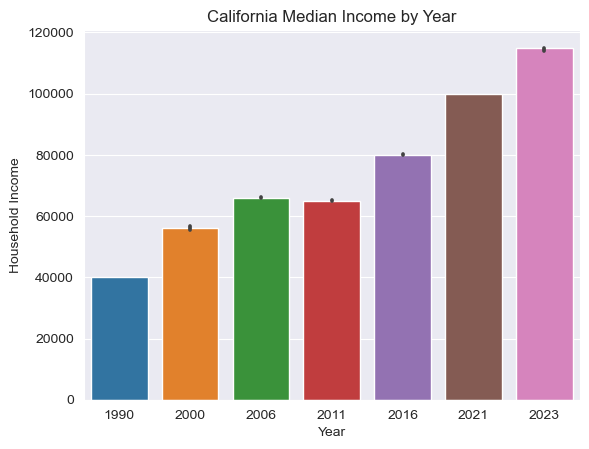

In [15]:
sns.barplot(data=hh_income_data, x='year', y='hh_income', estimator=np.median)

plt.xlabel("Year")
plt.ylabel("Household Income")
plt.title("California Median Income by Year")
plt.show()

### How has income distribution changed in California between 1990 and 2023?

**Create a violin plot of income distribution in California for each of the years in the dataset.**

The range of incomes appears to have qudarupled between 2023 as compared to 1990, with the incomes of the highest earners rising much quicker than those of the lowest and middle earners. Also of note is a big dip in incomes between 2006 and 2011, especially for the highest earners.

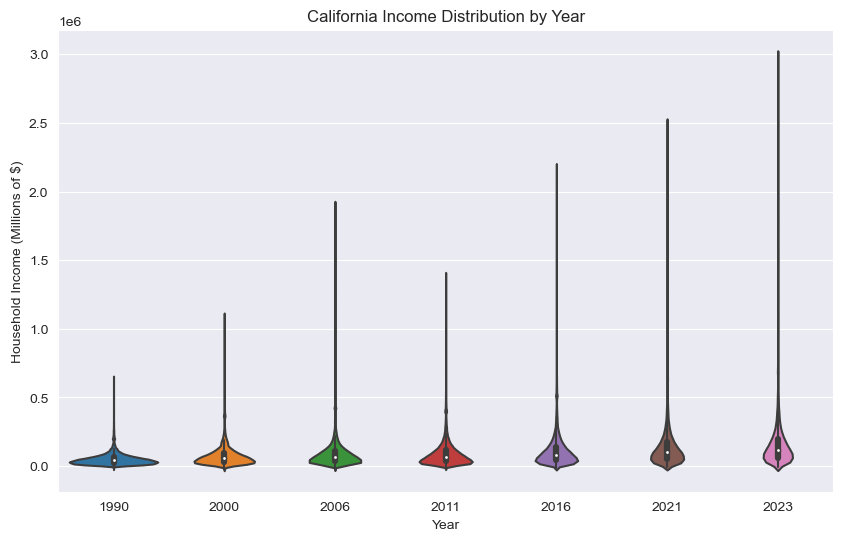

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=hh_income_data, y='hh_income', x='year')

plt.xlabel("Year")
plt.ylabel("Household Income (Millions of $)")
plt.title("California Income Distribution by Year")
plt.show()

### How has the proportion of renters vs. owners changed in California from 1990 to 2023?

**Rename ownership categories from numerical values to more descriptive names and then get a count of the values in each category (Rent, Own, and NA):** 

In [10]:
ownership = census_data[['year','ownershp']]
ownership['ownershp'] = ownership['ownershp'].replace({0: 'NA', 1: 'Own', 2: 'Rent'})
ownership_by_year = pd.DataFrame(ownership.groupby(['year', 'ownershp']).value_counts()).reset_index()
ownership_by_year.head()

,year,ownershp,count
0,1990,NA,5860
1,1990,Own,167622
2,1990,Rent,117486
3,2000,Own,24063
4,2000,Rent,14080


**Calculate the total number of family units for each year and merge the data with the count values in each ownership category (Rent, Own, and NA). Then, create a new column in the table containing the proportion of renters, owners, and NA for each year.**

In [11]:
ownership_by_year_totals = ownership.groupby('year').count()
ownership_by_year_totals = pd.merge(ownership_by_year, ownership_by_year_totals, on='year', how='inner')
ownership_by_year_totals = ownership_by_year_totals.rename(columns={'ownershp_y': 'yearly_total', 'ownershp_x':'ownership'})
ownership_by_year_totals['proportion'] = ownership_by_year_totals['count']/ownership_by_year_totals['yearly_total']
ownership_by_year_totals.head()

,year,ownership,count,yearly_total,proportion
0,1990,NA,5860,290968,0.020140
1,1990,Own,167622,290968,0.576084
2,1990,Rent,117486,290968,0.403776
3,2000,Own,24063,38143,0.630863
4,2000,Rent,14080,38143,0.369137


**Create a bar plot of the proportion of renters, owners, and NA by year for all of California.**

It looks like there the proportion of homeowners to renters was steadily increasing up until 2006 and then abruptly declined before starting to slowly rise again leading up to 2023.

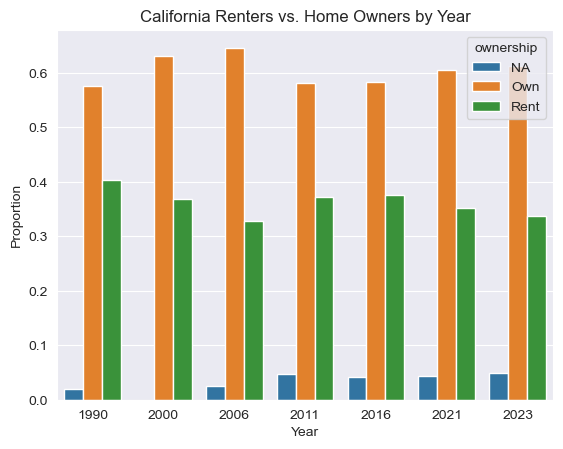

In [19]:
sns.barplot(data=pd.DataFrame(ownership_by_year_totals), y='proportion', x='year', hue='ownership')

plt.xlabel("Year")
plt.ylabel("Proportion")
plt.title("California Renters vs. Home Owners by Year")
plt.show()

### What is the median income of the highest, middle-high, middle, middle-low, and lowest earners (in 20% increments) by year in California?

**Add a column to the dataset categorizing the records of each year by income bracket.**

In [12]:
def categorize(value):
        if value > .80:
            return 'Highest'
        elif value >= .60:
            return 'Middle-high'
        elif value >= .40:
            return 'Middle'
        elif value >= .20:
            return 'Middle-low'
        else:
            return 'Lowest'

hh_income_1990 = hh_income_data[hh_income_data['year']==1990]
hh_income_1990['income_prop'] = hh_income_1990['hh_income']/hh_income_1990['hh_income'].mean()
hh_income_1990['income_category'] = hh_income_1990['income_prop'].apply(categorize)

hh_income_2000 = hh_income_data[hh_income_data['year']==2000]
hh_income_2000['income_prop'] = hh_income_2000['hh_income']/hh_income_2000['hh_income'].mean()
hh_income_2000['income_category'] = hh_income_2000['income_prop'].apply(categorize)

hh_income_2006 = hh_income_data[hh_income_data['year']==2006]
hh_income_2006['income_prop'] = hh_income_2006['hh_income']/hh_income_2006['hh_income'].mean()
hh_income_2006['income_category'] = hh_income_2006['income_prop'].apply(categorize)

hh_income_2011 = hh_income_data[hh_income_data['year']==2011]
hh_income_2011['income_prop'] = hh_income_2011['hh_income']/hh_income_2011['hh_income'].mean()
hh_income_2011['income_category'] = hh_income_2011['income_prop'].apply(categorize)

hh_income_2016 = hh_income_data[hh_income_data['year']==2016]
hh_income_2016['income_prop'] = hh_income_2016['hh_income']/hh_income_2016['hh_income'].mean()
hh_income_2016['income_category'] = hh_income_2016['income_prop'].apply(categorize)

hh_income_2021 = hh_income_data[hh_income_data['year']==2021]
hh_income_2021['income_prop'] = hh_income_2021['hh_income']/hh_income_2021['hh_income'].mean()
hh_income_2021['income_category'] = hh_income_2021['income_prop'].apply(categorize)

hh_income_2023 = hh_income_data[hh_income_data['year']==2023]
hh_income_2023['income_prop'] = hh_income_2023['hh_income']/hh_income_2023['hh_income'].mean()
hh_income_2023['income_category'] = hh_income_2023['income_prop'].apply(categorize)

hh_income_categories = pd.concat([hh_income_1990, hh_income_2000, hh_income_2006, hh_income_2011, hh_income_2016, hh_income_2021, hh_income_2023], ignore_index=True)
hh_income_categories.head()

,year,sample,serial,cbserial,hh_wt,cluster,countyfip,strata,group_quarters,ownershp,...,educd,emp_stat,empl_statd,occ,ind,inctot,ftotinc,poverty,income_prop,income_category
0,1990,199002,46452,NaN,52.0,1.990000e+12,0.0,57,1,1,...,2,3,30,0,0,3984,3984,53,0.081267,Lowest
1,1990,199002,46452,NaN,52.0,1.990000e+12,0.0,57,1,1,...,40,3,30,0,0,0,3984,53,0.081267,Lowest
2,1990,199002,46453,NaN,91.0,1.990000e+12,0.0,44,1,2,...,20,1,10,479,10,860,860,13,0.017542,Lowest
3,1990,199002,46454,NaN,117.0,1.990000e+12,0.0,53,1,1,...,30,3,30,0,0,13535,16929,226,0.345322,Middle-low
4,1990,199002,46454,NaN,117.0,1.990000e+12,0.0,53,1,1,...,50,3,30,0,0,3394,16929,226,0.345322,Middle-low


**Calculate the median income of each of the five income categories by year.**

In [13]:
hh_med_income_categories = pd.DataFrame(hh_income_categories.groupby(['year', 'income_category'])['hh_income'].median()).reset_index()
hh_med_income_categories

,year,income_category,hh_income
0,1990,Highest,62424.0
1,1990,Lowest,6333.0
2,1990,Middle,24658.0
3,1990,Middle-high,34000.0
4,1990,Middle-low,15000.0
5,2000,Highest,95500.0
6,2000,Lowest,9500.0
7,2000,Middle,36600.0
8,2000,Middle-high,51200.0
9,2000,Middle-low,22200.0


**Create a line plot of the median income in California by income bracket and year.**

It looks like the highest earners incomes grew much faster than the lowest earners incomes since 1990 in California. Also of note is an increase in this disparity among income brackets around 2011 or 2012.

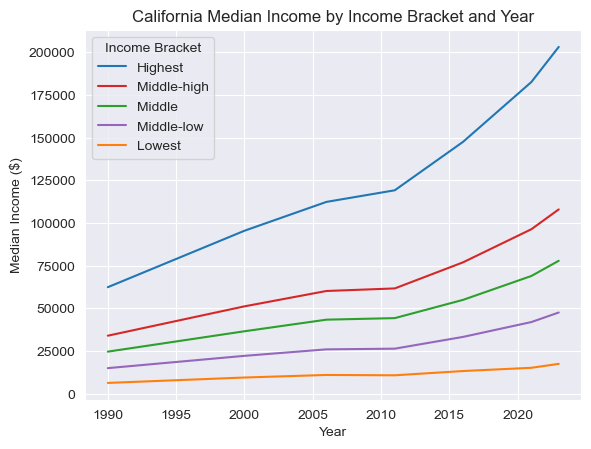

In [22]:
ax = sns.lineplot(data=hh_med_income_categories, x='year', y='hh_income', hue='income_category')

plt.xlabel("Year")
plt.ylabel("Median Income ($)")
plt.title("California Median Income by Income Bracket and Year")

# Create legend
handles, labels = ax.get_legend_handles_labels()
order = [0, 3, 2, 4, 1]
ordered_handles = [handles[i] for i in order]
ordered_labels = [labels[i] for i in order]
ax.legend(ordered_handles, ordered_labels).set_title('Income Bracket')

plt.show()

### How has median home value vs. median income changed in California between 1990 and 2023? 

****First, remove N/A values (denoted by 9999999) from the Household Income (hh_income) column and House Value (house_val) columns to prevent data from being skewed.****

In [14]:
hh_income_and_house_val_data = census_data[(census_data['hh_income'] != 9999999) & (census_data['house_val'] != 9999999)]
hh_income_and_house_val_data.size

46290090

**Add a column to the dataframe calculating House Value (house_val) / Household Income (hh_income).**

In [15]:
hh_income_and_house_val_data['house_val_income'] = hh_income_and_house_val_data['house_val'] / hh_income_and_house_val_data['hh_income']
hh_income_and_house_val_data['house_val_income'].head()

5     2.862595
6     8.571429
7     8.571429
9     2.130682
10    2.589454
Name: house_val_income, dtype: float64

**Create a line plot of median home value vs. median income over time.**

Between 1990 and 2000, the price of a house was about 3 to 3.5 times the median income of a household. By 2007, during the housing market crash, it looks like the median cost of a home was about 6 times the median income. By 2011, the cost of a home was about 3.75 times the median income (but likely harder to get due to new mortgage restrictions). Since then, the cost of a home vs. median income has been steadily rising, with the cost of a home about 5 times the median income in 2023. In other words, it looks like it takes a lot more financial resources to buy a home today than it did in the 1990's and early 2000's.

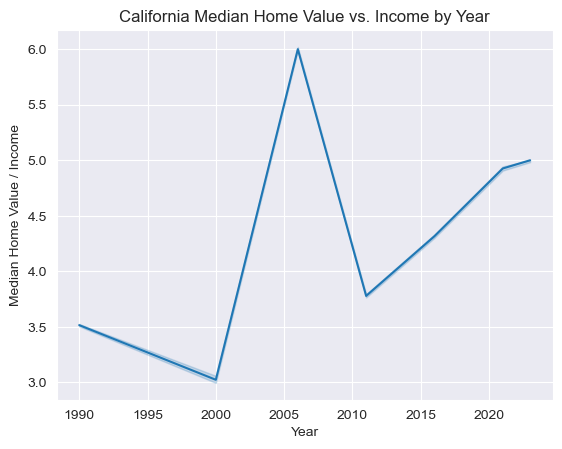

In [25]:
sns.lineplot(data=hh_income_and_house_val_data, x='year', y='house_val_income', estimator=np.median)

plt.xlabel("Year")
plt.ylabel("Median Home Value / Income")
plt.title("California Median Home Value vs. Income by Year")
plt.show()

### How has the proportion of income spent on rent changed in California between 1990 and 2023?

**First, subset data to only those households that are renting.**

In [16]:
hh_income_and_rent_data = census_data[(census_data['ownershp'] == 2)]

**Remove N/A values (denoted by 9999999) from the Household Income (hh_income) column to prevent data from being skewed:**

In [17]:
hh_income_and_rent_data = hh_income_and_rent_data[hh_income_and_rent_data['hh_income'] != 9999999]

**Add a column to the dataframe calculating Annual Rent / Household Income as a %.**

In [18]:
hh_income_and_rent_data['annual_rent'] = hh_income_and_rent_data['rent']*12
hh_income_and_rent_data['rent_income'] = (hh_income_and_rent_data['annual_rent'] / hh_income_and_rent_data['hh_income'])*100

**Remove rows NaN, infinity, zero, negative values from the newly created column (rent_income) to help subset data to only those households that are actively paying rent.** 

In [19]:
hh_income_and_rent_data = hh_income_and_rent_data.dropna(subset=['rent_income'])
hh_income_and_rent_data = hh_income_and_rent_data[~np.isinf(hh_income_and_rent_data['rent_income'])]
hh_income_and_rent_data = hh_income_and_rent_data[hh_income_and_rent_data['rent_income'] != 0]

**Create a line plot of the median proportion of income spent on rent over time.**

Among renters, it looks like a little over 23% of one's income was spent on rent between 1990 and 2000. This percentage began to rise drastically in the years leading up to, during, and after the housing crisis of 2007-2009, peaking at around 30% of one's income in 2011. While the expected percentage of one's income that is spent on rent has steadily declined since 2011, it was still rent was still around 26% of one's income in 2023, which was several percentage points higher than during the 1990's.

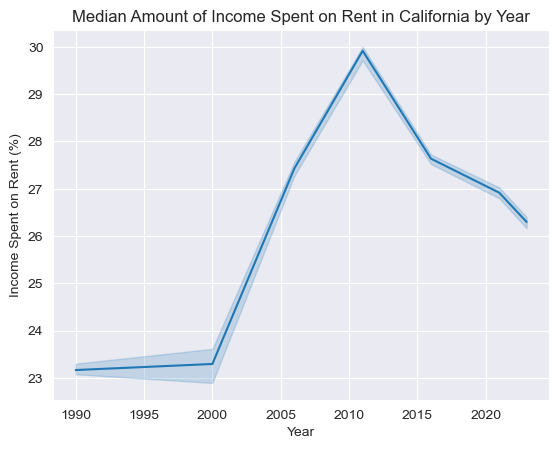

In [30]:
sns.lineplot(data=hh_income_and_rent_data, x='year', y='rent_income', estimator = np.median)

plt.xlabel("Year")
plt.ylabel("Income Spent on Rent (%)")
plt.title("Median Amount of Income Spent on Rent in California by Year")
plt.show()

### How has the average monthly rent cost changed in California between 1990 and 2023?

**Calculate the average monthly rent by year in California (to see exact values).**

In [20]:
hh_income_and_rent_data.groupby('year')['rent'].mean()

year
1990     575.488429
2000     796.011257
2006    1048.008841
2011    1183.541082
2016    1409.028311
2021    1785.275719
2023    2000.966881
Name: rent, dtype: float64

**Create a bar plot to visualize average monthly rent by year in California.**

Median monthly rent has steadily risen from 1990 to 2023, more than tripling in that time frame from around \\$575/month in 1990 to \\$2000/month in 2023. This means that average monthly rental cost has risen a lot faster than median incomes.

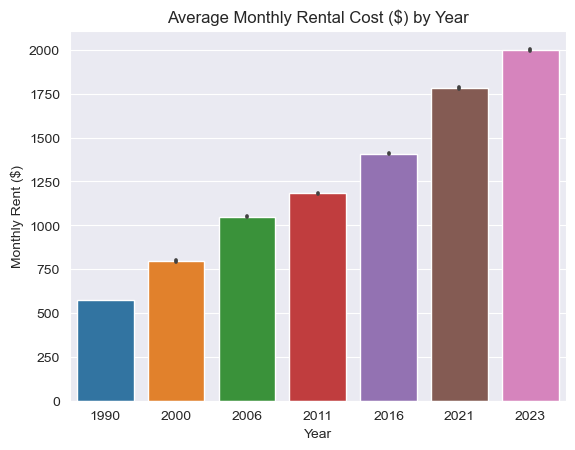

In [32]:
sns.barplot(data=hh_income_and_rent_data, x='year', y='rent', estimator=np.mean)

plt.xlabel("Year")
plt.ylabel("Monthly Rent ($)")
plt.title("Average Monthly Rental Cost ($) by Year")
plt.show()

### How has the average home ownership age changed in California between 1990 and 2023?

**First, subset data to only those households that own their home.**

In [21]:
home_owner_data = census_data[(census_data['ownershp'] == 1)]

**Calculate the average homeowner age by year in California (to see exact values).**

In [22]:
home_owner_data.groupby('year')['age'].mean()

year
1990    37.256536
2000    39.531231
2006    39.787141
2011    42.417636
2016    43.763237
2021    44.790820
2023    45.223756
Name: age, dtype: float64

**Create a bar plot of average age of homeowners by year in California.**

The average homeowner age in California has steadily risen from about 37 years old in 1990 to 45 years old in 2023.

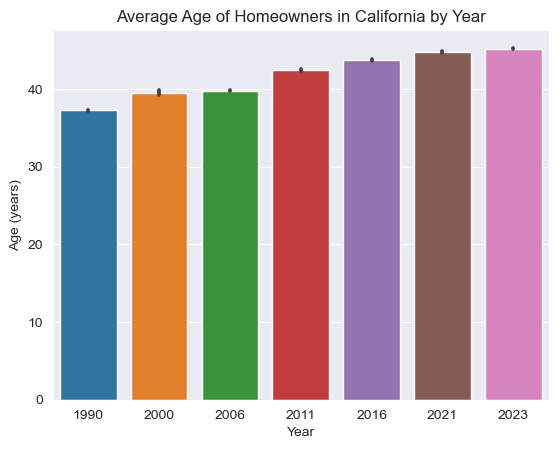

In [35]:
sns.barplot(data=home_owner_data, x='year', y='age')

plt.xlabel("Year")
plt.ylabel("Age (years)")
plt.title("Average Age of Homeowners in California by Year")
plt.show()

### How has the median income in California changed by race between 1990 and 2023?

**Add column to describe the values in the race category and combine those with similar names.**

In [23]:
race_income_data = census_data.copy()
race_income_data['race_desc'] = race_income_data['race'].map({1:'White', 2:'Black', 3:'Native American', 
                                                              4:'Asian', 5:'Asian', 6: 'Asian', 7:'Other/Mixed',
                                                              8:'Other/Mixed', 9:'Other/Mixed'})

**Group median income by race and year.**

In [24]:
race_income_data = pd.DataFrame(race_income_data.groupby(['year','race_desc'])['hh_income'].median()).reset_index()
race_income_data.head()

,year,race_desc,hh_income
0,1990,Asian,45644.0
1,1990,Black,32400.0
2,1990,Native American,31736.0
3,1990,Other/Mixed,30000.0
4,1990,White,44000.0


**Create a line plot showing how median income has changed by race and year.**

Median incomes has risen the fastest for Asians and second fastest for Whites (even though the incomes of these two races were about the same in 1990). Black, Native American, and Mixed/Other median incomes rose at roughly the same rate, but less than Asian-Americans or Whites. Unfortunately, this graph doesn't also show specific changes for Hispanic/Latinos (not added until 2020).

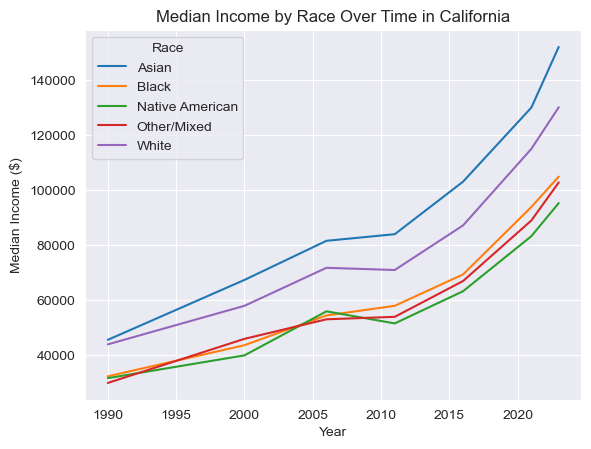

In [38]:
sns.lineplot(data=race_income_data, x='year', y='hh_income', hue='race_desc')

plt.xlabel("Year")
plt.ylabel("Median Income ($)")
plt.legend(title='Race')
plt.title("Median Income by Race Over Time in California")

plt.show()

### How has the average home ownership age changed by race in California between 1990 and 2023?

**First, calculate the average homeowner age by year and race in California.**

In [79]:
home_owner_race_data = pd.DataFrame(home_owner_data.groupby(['year', 'race'])['age'].mean()).reset_index()

**Add column to describe the values in the race category and combine those with similar names.**

In [80]:
home_owner_race_data['race_desc'] = home_owner_race_data['race'].map({1:'White', 2:'Black', 3:'Native American', 
                                                                      4:'Asian', 5:'Asian', 6: 'Asian', 7:'Other/Mixed',
                                                                      8:'Other/Mixed', 9:'Other/Mixed'})
home_owner_race_data.head()

,year,race,age,race_desc
0,1990,1,38.971685,White
1,1990,2,36.234361,Black
2,1990,3,34.208363,Native American
3,1990,4,33.500000,Asian
4,1990,5,40.752550,Asian


**Plot average home owner age by race and year.**

The average homeowner age appears to be increasing for all races, especially for Whites, Blacks, and Asians, and less so for Native Americans. Interestingly, the Other/Mixed race category shows a very strange trend of having the smallest average homeowner age overall. 

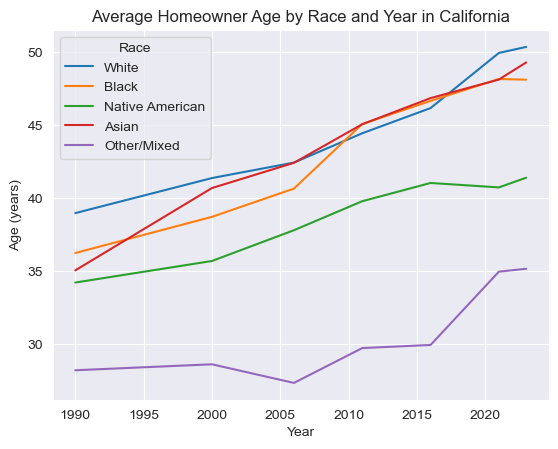

In [82]:
sns.lineplot(data=home_owner_race_data, x='year', y='age', hue='race_desc', ci=None)

plt.xlabel("Year")
plt.ylabel("Age (years)")
plt.legend(title='Race')
plt.title("Average Homeowner Age by Race and Year in California")

plt.show()

### How has average monthly rent cost changed by race in California between 1990 and 2023?

**Add a column to the rental data table to describe values in the race category.**

In [25]:
hh_income_and_rent_data['race_desc'] = hh_income_and_rent_data['race'].map({1:'White', 2:'Black', 3:'Native American', 
                                                                            4:'Asian', 5:'Asian', 6: 'Asian', 7:'Other/Mixed',
                                                                            8:'Other/Mixed', 9:'Other/Mixed'})

**Group average monthly rent by race and year.**

In [26]:
race_rent_data = pd.DataFrame(hh_income_and_rent_data.groupby(['year','race_desc'])['rent'].mean()).reset_index()
race_rent_data.head()

,year,race_desc,rent
0,1990,Asian,594.282105
1,1990,Black,535.093257
2,1990,Native American,484.207289
3,1990,Other/Mixed,511.529825
4,1990,White,600.327434


**Create a line plot showing how average monthly rent has changed by race and year.**

Average monthly rent has risen steadily for all groups, rising the most dramatically for Whites and Asians, second most for Blacks and Other/Mixed race, and the least for Native American. These rises fall somewhat in line with what we see in the median income distribution by race.

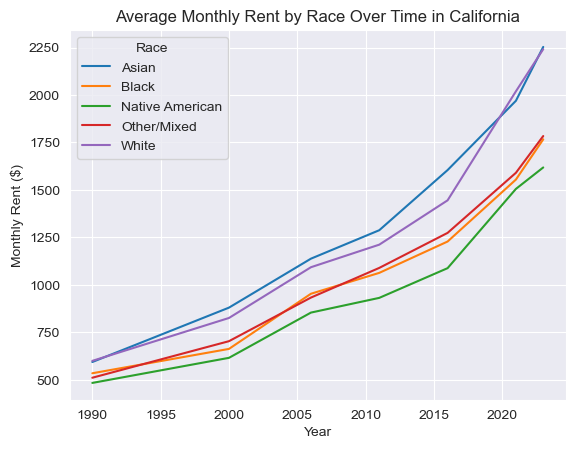

In [41]:
sns.lineplot(data=race_rent_data, x='year', y='rent', hue='race_desc')

plt.xlabel("Year")
plt.ylabel("Monthly Rent ($)")
plt.legend(title='Race')
plt.title("Average Monthly Rent by Race Over Time in California")

plt.show()

### How has the median income in California changed by county between 1990 and 2023?

**First, read in manually created .csv file to translate county fips codes into county names and reset the dataframe index to be county fips code.**

In [27]:
county_fips = pd.read_csv('County_fips.csv')
county_fips = county_fips.set_index('FIPS')
county_fips.head()

,County
FIPS,
1,Alameda
3,Alpine
5,Amador
7,Butte
9,Calaveras


**Remove NaN county fip values from hh_income_data and convert countyfip column to int.**

In [28]:
hh_income_data = hh_income_data.dropna(subset=['countyfip'])
hh_income_data['countyfip'] = hh_income_data['countyfip'].astype(int)

**Turn the county_fips dataframe into a dictionary and use it to create a new column in hh_income that countains county names for each row in the dataset. Then, sort the entire dataset by county name.**

In [29]:
county_dict = county_fips.to_dict()

hh_income_data['county_names'] = hh_income_data['countyfip'].map(county_dict['County'])
hh_income_data = hh_income_data.sort_values(by='county_names')

**Calculate the median income grouped by county name and year, and change column headers for cleaner visual in final plot.**

In [34]:
county_income_data = pd.DataFrame(hh_income_data.groupby(['year','county_names'])['hh_income'].median()).reset_index()
county_income_data = county_income_data.rename(columns={'year': 'Year', 'county_names': 'County', 'hh_income': 'Median Income ($)'})
county_income_data.head()

,Year,County,Median Income ($)
0,1990,Alameda,44639.0
1,1990,Butte,26546.5
2,1990,Contra Costa,50276.0
3,1990,El Dorado,41200.0
4,1990,Fresno,29634.0


**Create several bar plots of median income in relation to county name for each year in the dataset (excluding the year 2000 since the fips codes were unavailable for that year).**

It looks like there was increasing median income variability between 1990 and 2023 between counties, with some counties median incomes increasing much faster than other counties. 

Note: Unfortunately, the sample size of data is not able to capture the counties with a population size <65,000, which would have been interesting to look at to compare rural vs. urban counties. Also, for unknown reasons, Monterey doesn't show for every year even though its population size is large enough. The year 2000 isn't shown as well since its sample size was too small to look at county-level data.

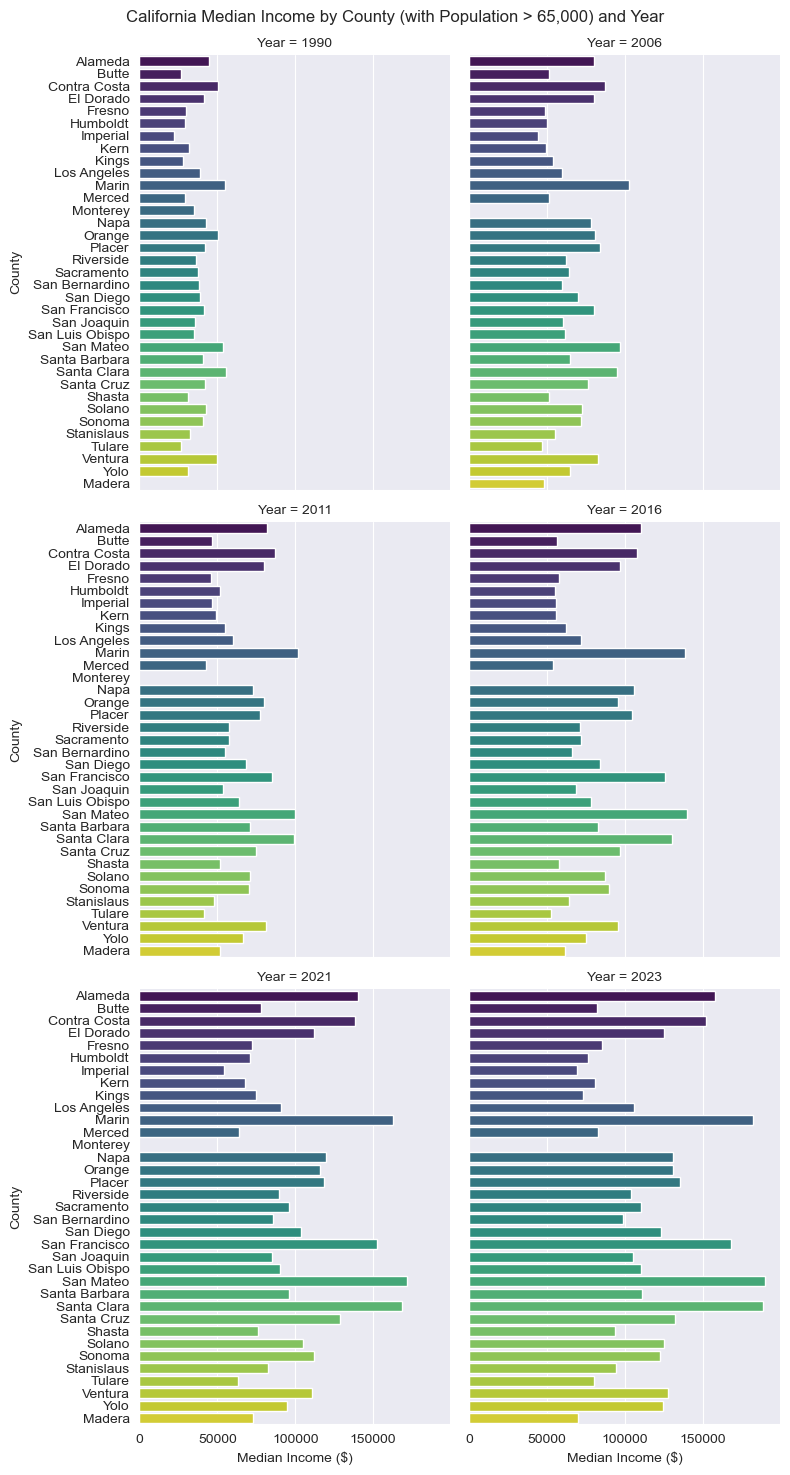

In [59]:
g = sns.catplot(data=county_income_data, y='County', x='Median Income ($)', col='Year', col_wrap=2, 
                kind='bar', height=5, aspect=0.8, palette='viridis')

# Add a title to the plots
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('California Median Income by County (with Population > 65,000) and Year')

plt.show()

### How has the average monthly rent cost in California changed by county between 1990 and 2023?

**Remove NaN county fip values from hh_income_rent_data and convert countyfip column to int.**

In [65]:
hh_income_and_rent_data = hh_income_and_rent_data.dropna(subset=['countyfip'])
hh_income_and_rent_data['countyfip'] = hh_income_and_rent_data['countyfip'].astype(int)

**Create a new column in hh_income_and_rent_data that countains county names for each row in the dataset. Then, sort the entire dataset by county name.**

In [63]:
hh_income_and_rent_data['county_names'] = hh_income_and_rent_data['countyfip'].map(county_dict['County'])
hh_income_and_rent_data = hh_income_and_rent_data.sort_values(by='county_names')

**Calculate the average monthly rent cost grouped by county name and year, and change column headers for cleaner visual in final plot.**

In [67]:
county_rent_data = pd.DataFrame(hh_income_and_rent_data.groupby(['year','county_names'])['rent'].mean()).reset_index()
county_rent_data = county_rent_data.rename(columns={'year': 'Year', 'county_names': 'County', 'rent': 'Average Monthly Rent ($)'})
county_rent_data.head()

,Year,County,Average Monthly Rent ($)
0,1990,Alameda,605.008715
1,1990,Butte,402.596059
2,1990,Contra Costa,640.210789
3,1990,El Dorado,498.049080
4,1990,Fresno,348.429778


**Create several bar plots of average monthly rent in relation to county name for each year in the dataset (excluding the year 2000 since the fips codes were unavailable for that year).**

The average monthly rent cost shows a very similar pattern to median income with increasing average monthly rent variability between 1990 and 2023 between counties, with some counties average monthly rent increasing much faster than other counties.  

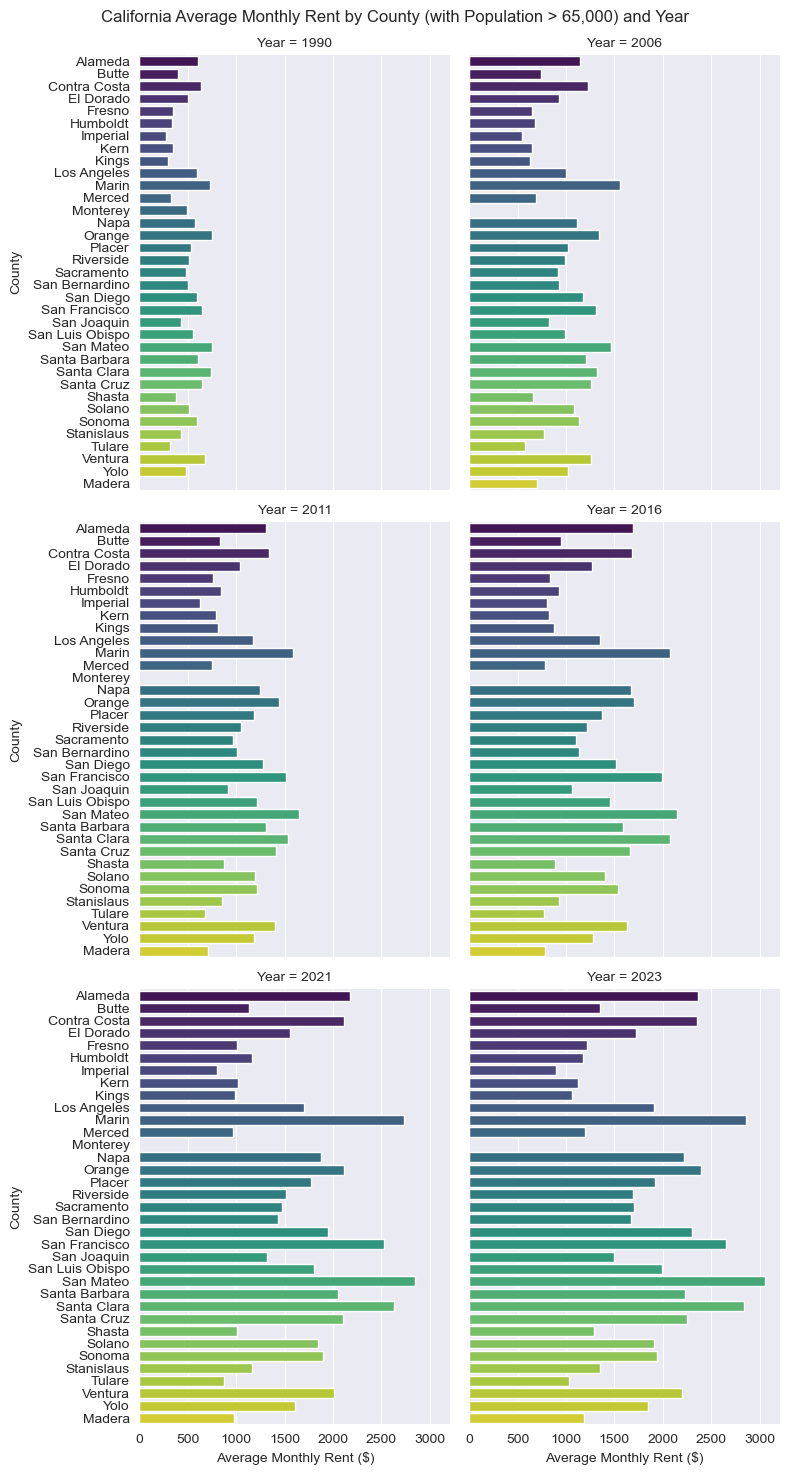

In [69]:
g = sns.catplot(data=county_rent_data, y='County', x='Average Monthly Rent ($)', col='Year', col_wrap=2, 
                kind='bar', height=5, aspect=0.8, palette='viridis')

# Add a title to the plots
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('California Average Monthly Rent by County (with Population > 65,000) and Year')

plt.show()

### How has the average home value in California changed by county between 1990 and 2023? 

**Remove NaN county fip values from hh_income_and_house_val_data and convert countyfip column to int.**

In [62]:
hh_income_and_house_val_data = hh_income_and_house_val_data.dropna(subset=['countyfip'])
hh_income_and_house_val_data['countyfip'] = hh_income_and_house_val_data['countyfip'].astype(int)

**Create a new column in hh_income_and_house_val_data that countains county names for each row in the dataset. Then, sort the entire dataset by county name.**

In [64]:
hh_income_and_house_val_data['county_names'] = hh_income_and_house_val_data['countyfip'].map(county_dict['County'])
hh_income_and_house_val_data = hh_income_and_house_val_data.sort_values(by='county_names')

**Calculate the average home value grouped by county name and year, and change column headers for cleaner visual in final plot.**

In [74]:
county_home_val_data = pd.DataFrame(hh_income_and_house_val_data.groupby(['year','county_names'])['house_val'].mean()).reset_index()
county_home_val_data = county_home_val_data.rename(columns={'year': 'Year', 'county_names': 'County', 'house_val': 'Average House Value ($1,000,000)'})
county_home_val_data.head()

,Year,County,"Average House Value ($1,000,000)"
0,1990,Alameda,239647.433278
1,1990,Butte,99089.845803
2,1990,Contra Costa,235961.703916
3,1990,El Dorado,184737.404073
4,1990,Fresno,100327.575859


**Create several bar plots of average home value in relation to county name for each year in the dataset (excluding the year 2000 since the fips codes were unavailable for that year).**

Similar to median income and average rent, avearge home values have shown increasing variability between counties between 1990 and 2023, with some counties home values increasing much faster than other counties. This pattern is particularly pronounced after the housing market crash of 2007-2009.

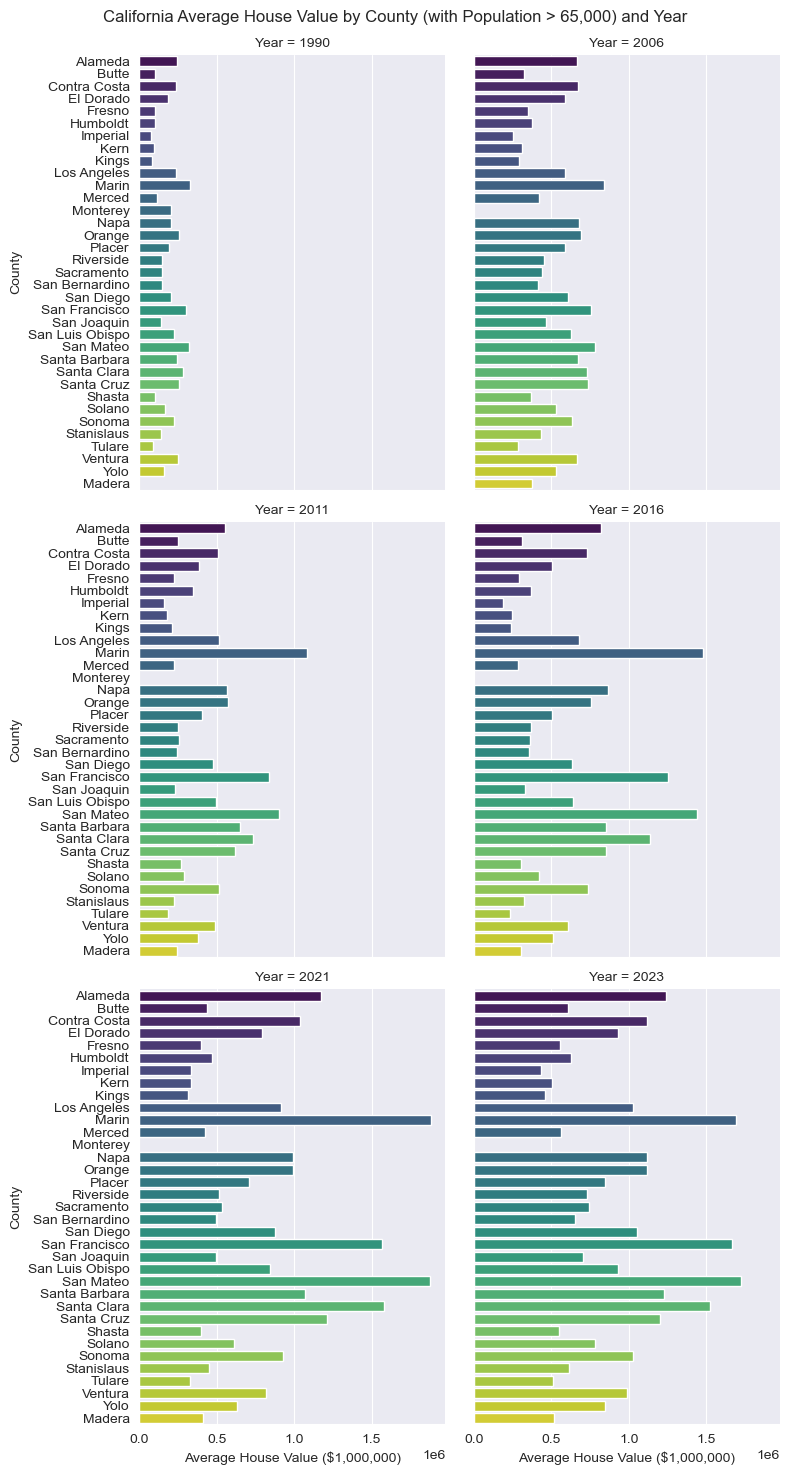

In [75]:
g = sns.catplot(data=county_home_val_data, y='County', x='Average House Value ($1,000,000)', col='Year', col_wrap=2, 
                kind='bar', height=5, aspect=0.8, palette='viridis')

# Add a title to the plots
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('California Average House Value by County (with Population > 65,000) and Year')

plt.show()

## Summary